# Hand Gesture Classification

This project focuses on classifying hand gestures using landmark data generated by MediaPipe from the HaGRID dataset. The dataset contains 18 different hand gestures, each represented by 21 hand landmarks (x, y, z coordinates). The goal is to train a machine learning model capable of recognizing and classifying these gestures.

#### HaGRID Gesture Samples  
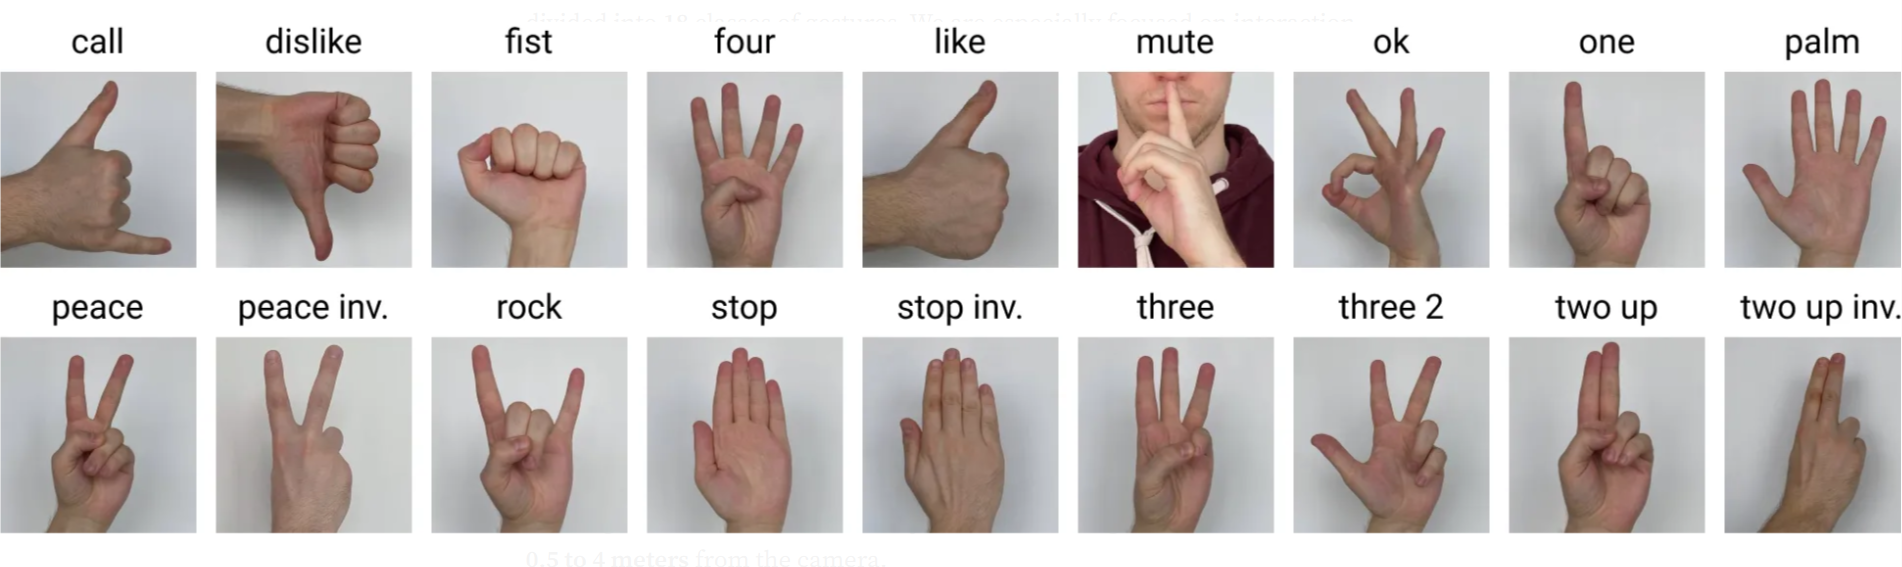

#### MediaPipe Hand Landmarks  
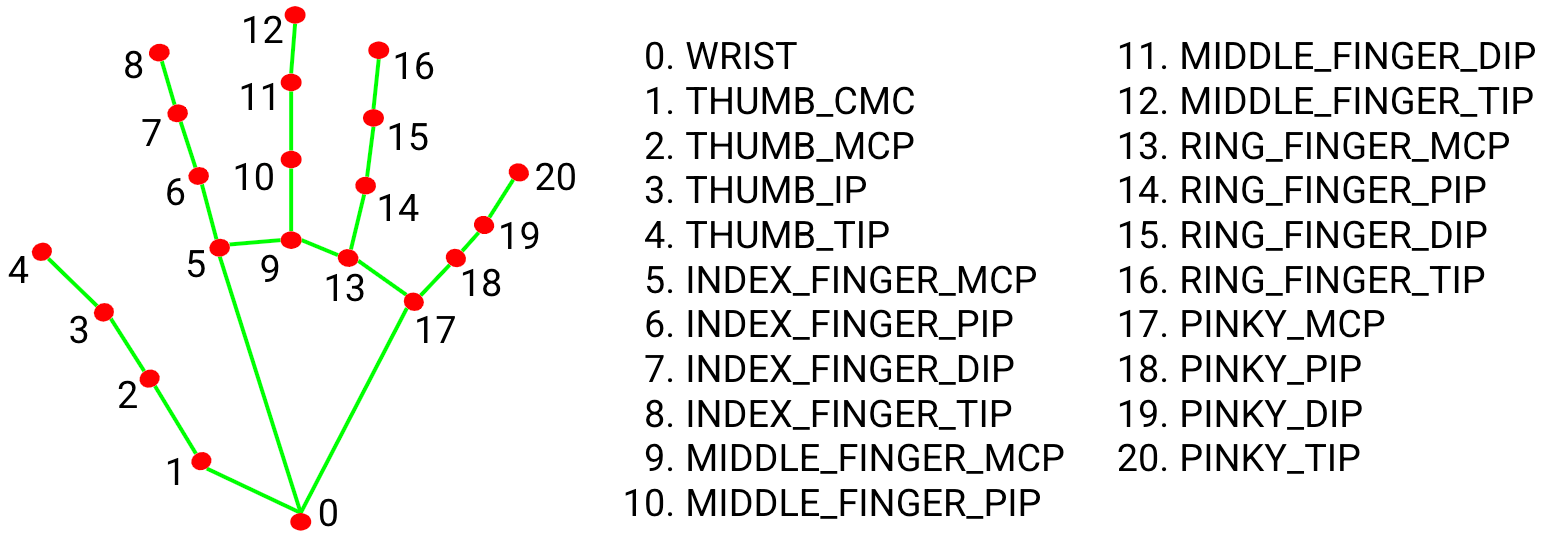

## Code Implementation

#### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing Essential Libraries

In [ ]:
!pip install mlflow scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62

In [ ]:
import mlflow
import mlflow.sklearn
import os

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SupervisedML_Project_Soha/hand_landmarks_data.csv')

df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [ ]:
df.shape

(25675, 64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

### Data Visualization

#### Hand Landmarks

In [ ]:
def plot_hand_2d(row_data, ax=None, title=""):
    """
    Plot 2D hand landmarks from a CSV row format.
    """
    # Extract just the coordinates (exclude label)
    coords = row_data[:-1]

    # Reshape to (21, 3) array and use only x,y coordinates
    landmarks = np.array(coords).reshape(21, 3)[:, :2]

    # Create figure if no axis provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))

    # Define connections between landmarks (MediaPipe hand connections)
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 4],  # Thumb
        [0, 5], [5, 6], [6, 7], [7, 8],  # Index
        [0, 9], [9, 10], [10, 11], [11, 12],  # Middle
        [0, 13], [13, 14], [14, 15], [15, 16], # Ring
        [0, 17], [17, 18], [18, 19], [19, 20], # Pinky
        [5, 9], [9, 13], [13, 17]  # Knuckles
    ]

    # Plot landmarks
    ax.scatter(landmarks[:, 0], landmarks[:, 1], c='r', marker='o', s=50)

    # Plot connections
    for connection in connections:
        start, end = connection
        ax.plot([landmarks[start, 0], landmarks[end, 0]],
                [landmarks[start, 1], landmarks[end, 1]], 'b-', linewidth=2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Invert y-axis to match image coordinates (if needed)
    ax.invert_yaxis()

    # Set title with gesture label
    gesture_label = row_data[-1] if len(row_data) > 63 else "Unknown"
    ax.set_title(f"{title}\nGesture: {gesture_label}")

    # Set equal aspect ratio
    ax.set_aspect('equal')

    return ax

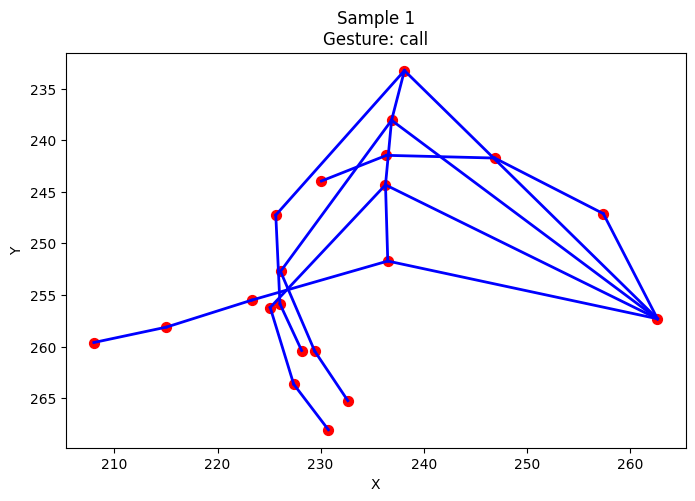

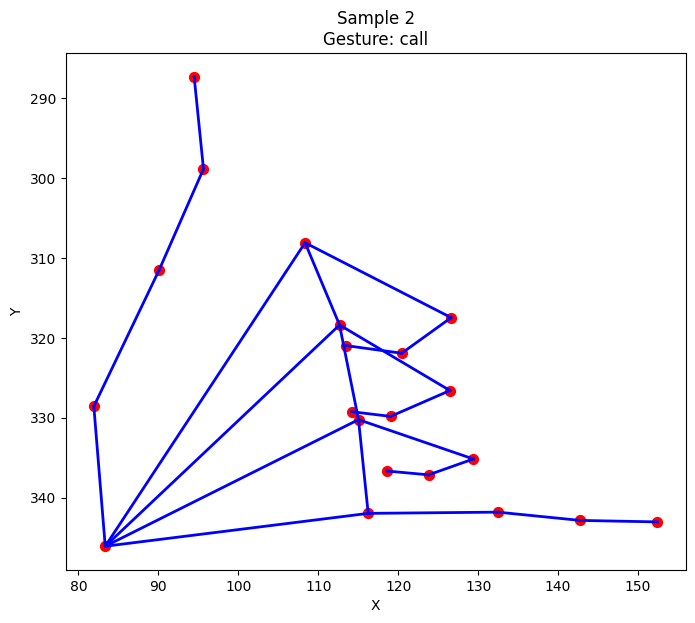

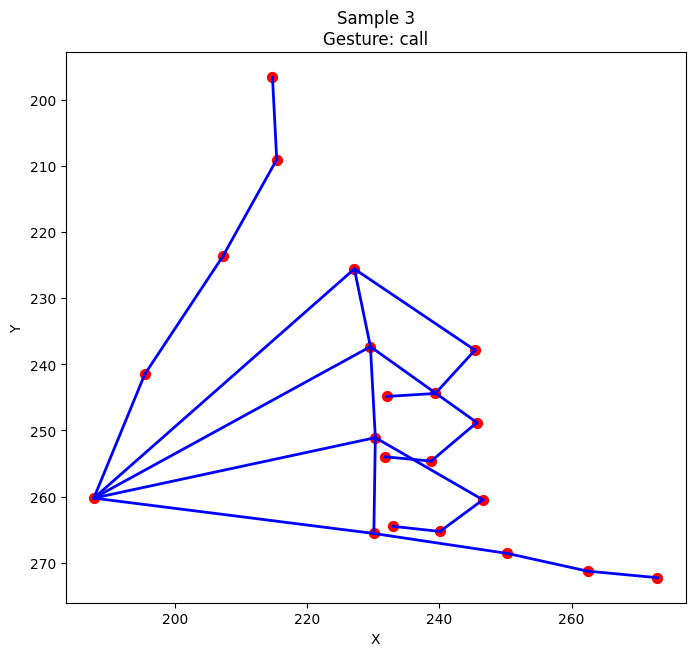

In [ ]:
# Visualize first few samples
for i in range(min(3, len(df))):  # Show first 3 samples
    row_data = df.iloc[i].values
    plot_hand_2d(row_data, title=f"Sample {i+1}")
    plt.show()

#### Class Distribution

<ipython-input-41-47191e900bff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="magma")


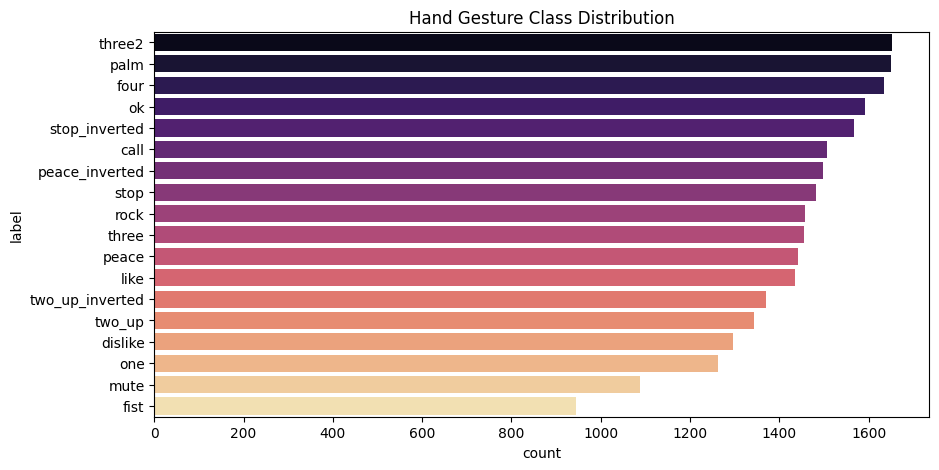

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette="magma")
plt.title("Hand Gesture Class Distribution")
plt.show()

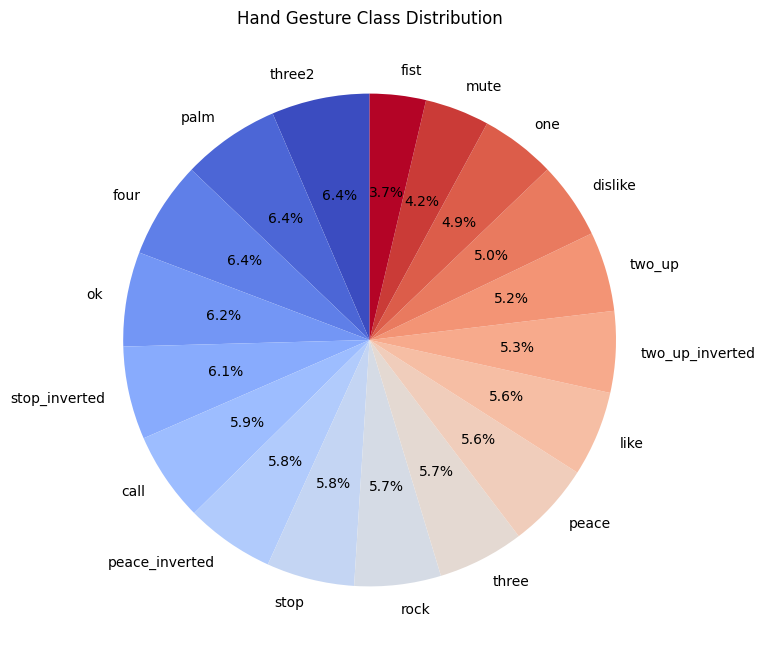

In [ ]:
plt.figure(figsize=(8, 8))
df["label"].value_counts().plot.pie(
    autopct="%1.1f%%",  # Show percentages
    startangle=90,  # Rotate for better alignment
    cmap="coolwarm"
)
plt.title("Hand Gesture Class Distribution")
plt.ylabel("")  # Hide y-label for better appearance
plt.show()

#### Correlation Heatmap

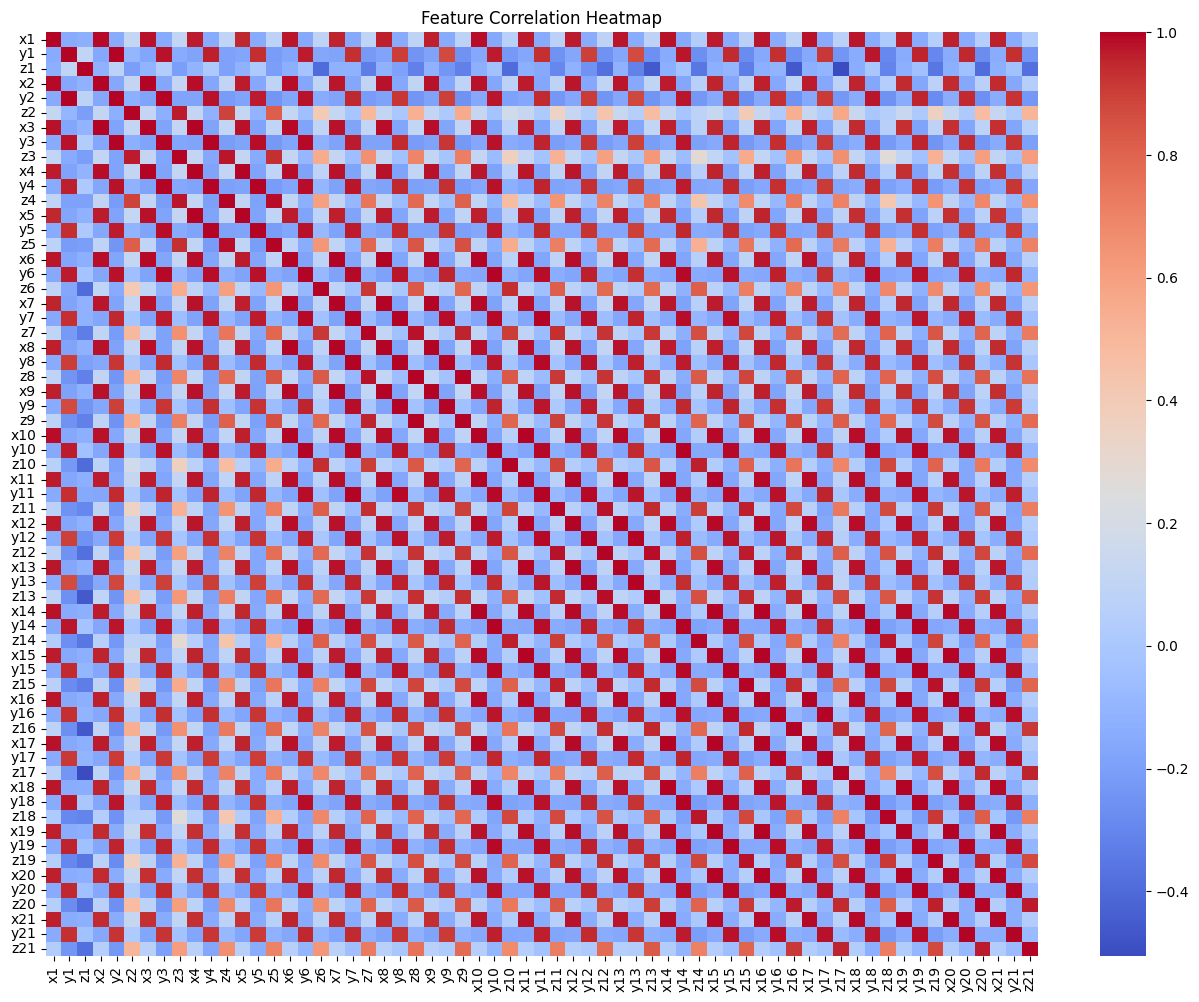

In [ ]:
# Compute correlation matrix
correlation_matrix = df.drop(columns="label").corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Data Preprocessing

##### Check null values

In [ ]:
# Check missing values
null_counts = df.isnull().sum()
null_counts

,0
x1,0
y1,0
z1,0
x2,0
y2,0
...,...
z20,0
x21,0
y21,0
z21,0


In [ ]:
null_counts[null_counts > 0]  # Display only columns with missing values

,0


##### Check duplicates

In [ ]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

#### Data Normalization

In [ ]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


In [ ]:
def normalize_hand_landmarks(df):
    """
    Normalize hand landmarks by:
    1. Re-centering all points to the wrist (landmark 0).
    2. Scaling all points based on the distance to the mid-finger tip (landmark 12).

    Args:
        df: DataFrame with columns x1,y1,z1,x2,y2,z2,...,x21,y21,z21,label

    Returns:
        Normalized DataFrame
    """
    num_landmarks = 21  # Total hand landmarks

    # Create sorted column lists
    x_cols = [f'x{i}' for i in range(1, num_landmarks+1)]
    y_cols = [f'y{i}' for i in range(1, num_landmarks+1)]
    z_cols = [f'z{i}' for i in range(1, num_landmarks+1)]

    # Convert to NumPy arrays
    x_values = df[x_cols].values.astype(float)
    y_values = df[y_cols].values.astype(float)

    # Recenter landmarks (subtract wrist coordinates)
    wrist_x = x_values[:, 0].copy()
    wrist_y = y_values[:, 0].copy()

    x_values -= wrist_x[:, np.newaxis]
    y_values -= wrist_y[:, np.newaxis]

    # Step 2: Scale using mid-finger tip (landmark 12 in 0-based index)
    mid_x = x_values[:, 12]
    mid_y = y_values[:, 12]

    # Calculate scale factor
    scale_factor = np.sqrt(mid_x**2 + mid_y**2)

    x_values /= scale_factor[:, np.newaxis]
    y_values /= scale_factor[:, np.newaxis]

    # Update DataFrame
    df[x_cols] = x_values
    df[y_cols] = y_values

    return df

In [ ]:
# Normalize landmarks
normalized_df = normalize_hand_landmarks(df)

# Check the transformed data
normalized_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.169097,-0.328246,0.004224,-0.508248,-0.501843,0.005798,-0.846234,...,-1.266027,-0.058407,-0.020450,-1.533293,0.026072,-0.024577,-1.759842,0.074168,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.040618,-0.498120,-0.011102,0.191551,-0.982869,-0.021096,0.349889,...,1.397837,-0.121412,-0.038175,1.691695,-0.091952,-0.037336,1.966655,-0.086635,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.172978,-0.420554,-0.000184,0.437913,-0.820949,-0.009687,0.621006,...,1.404373,0.187884,-0.044068,1.676609,0.247919,-0.040469,1.913833,0.270275,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.020056,-0.468103,-0.002824,0.070355,-0.911821,-0.008911,0.114792,...,1.280797,-0.094800,-0.027622,1.529073,-0.079763,-0.027863,1.738331,-0.086693,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.009611,-0.482677,-0.002884,0.111650,-1.075914,-0.008115,0.131602,...,1.327537,-0.331511,-0.025113,1.612488,-0.386821,-0.024087,1.849127,-0.464123,-0.023486,call


In [ ]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.0,25675.0,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,0.0,0.0,1.272461e-07,0.014740,-0.139833,-0.009465,0.025192,-0.336521,-0.015946,0.028839,...,-0.024129,0.008403,-0.557311,-0.033751,0.007659,-0.541289,-0.032208,0.007758,-0.540012,-0.028828
std,0.0,0.0,2.737932e-07,0.243225,0.217575,0.010376,0.434557,0.425219,0.013973,0.509919,...,0.015658,0.629326,0.509256,0.020453,0.628093,0.555028,0.020877,0.640435,0.620496,0.021136
min,0.0,0.0,-2.029986e-06,-5.834705,-1.392862,-0.096630,-13.681659,-2.760927,-0.155846,-17.489483,...,-0.201897,-28.505611,-34.657750,-0.286821,-30.736563,-40.190918,-0.286470,-32.398157,-44.058062,-0.262047
25%,0.0,0.0,-5.243216e-08,-0.156725,-0.209768,-0.015199,-0.266598,-0.534523,-0.023020,-0.291434,...,-0.030728,-0.252365,-0.612102,-0.042726,-0.248055,-0.699451,-0.041957,-0.237035,-0.773254,-0.039220
50%,0.0,0.0,1.497277e-07,0.086394,-0.122418,-0.008737,0.087623,-0.301500,-0.014231,0.028274,...,-0.020969,-0.048674,-0.517549,-0.029942,-0.032086,-0.502716,-0.028510,-0.018237,-0.436731,-0.025269
75%,0.0,0.0,2.989988e-07,0.169421,-0.078231,-0.002783,0.299678,-0.227268,-0.007134,0.362566,...,-0.013661,0.255795,-0.399171,-0.019987,0.250618,-0.323693,-0.017971,0.239970,-0.260496,-0.014294
max,0.0,0.0,1.876254e-06,1.207385,8.901224,0.076365,1.872273,18.811699,0.094131,2.512387,...,0.031774,2.941622,1.206058,0.078105,3.571379,1.414245,0.104580,3.850528,1.678562,0.118668


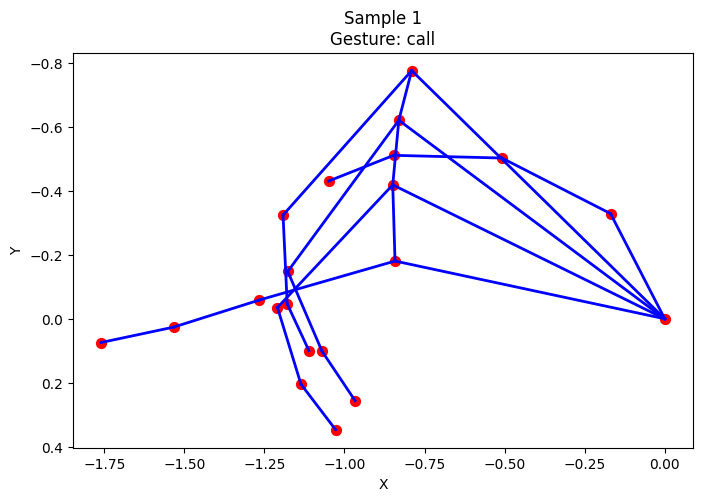

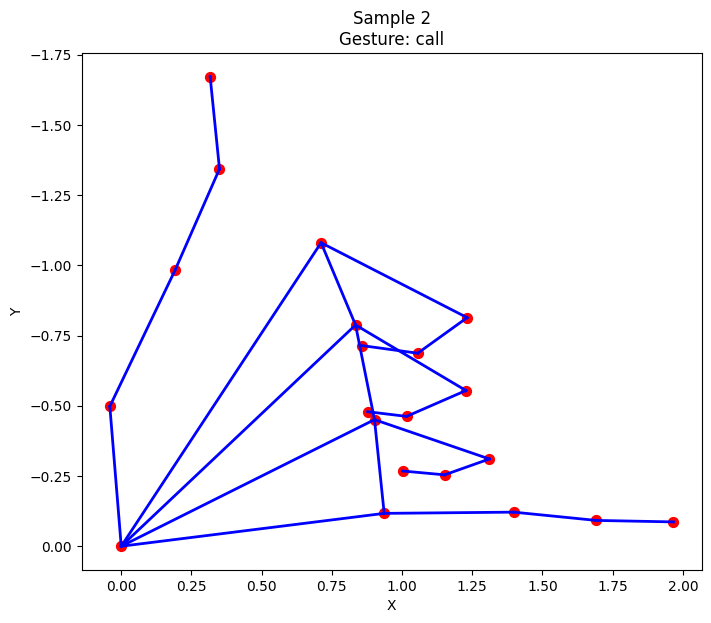

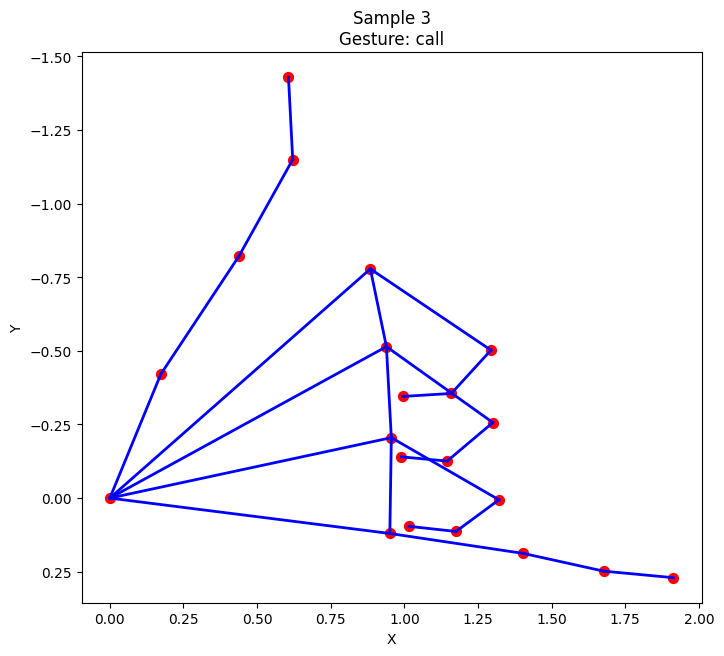

In [ ]:
# Visualize first few samples after normalization
for i in range(min(3, len(normalized_df))):  # Show first 3 samples
    row_data = normalized_df.iloc[i].values
    plot_hand_2d(row_data, title=f"Sample {i+1}")
    plt.show()

#### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import json

label_encoder = LabelEncoder()

normalized_df['label'] = label_encoder.fit_transform(normalized_df['label'])

with open('/content/drive/MyDrive/SupervisedML_Project_Soha/labels.json', 'w') as f:
    json.dump(label_encoder.classes_.tolist(), f)

# Print encoding mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17)}


### Feature Selection

In [ ]:
# Splitting features and label
X = normalized_df.drop(columns=['label'])
y = normalized_df['label']

#### Checking feature importace

In [ ]:
# Checking the most important features
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X, y)

# Get the importance of the resulting features
importances = model.feature_importances_

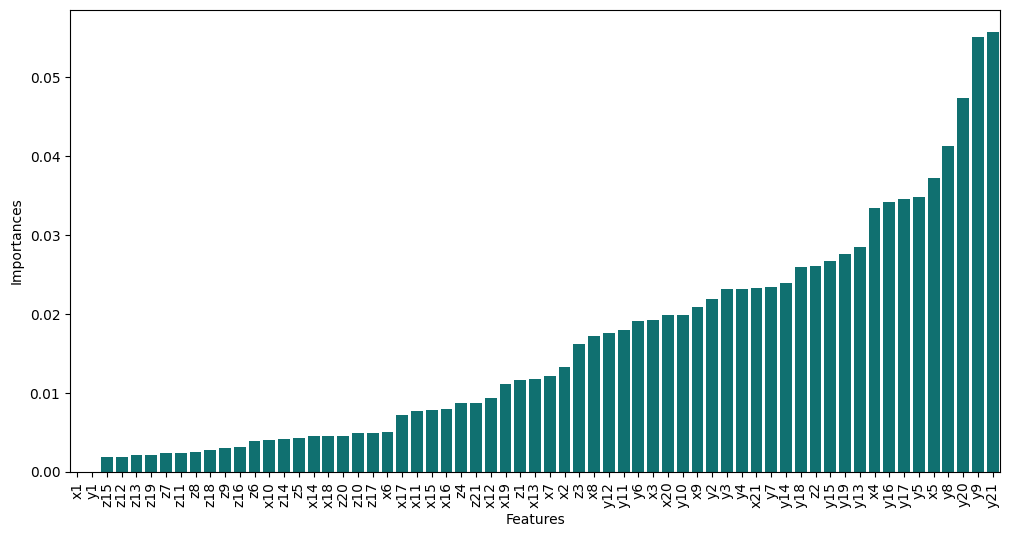

In [ ]:
# Create a data frame for visualization
importance_df = pd.DataFrame({'Features': pd.DataFrame(X).columns, 'Importances': importances})
importance_df.set_index('Importances')

# Sort in ascending order for better visualization
importance_df = importance_df.sort_values('Importances')

# Plot the feature importances in bars
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df.iloc[:, 0], y=importance_df.iloc[:, 1], color="teal")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Remove features with importance < 0.01
threshold = 0.01
selected_features = importance_df[importance_df['Importances'] > threshold].sort_values(by='Importances')

# Get the sorted list of selected features
selected_features = selected_features['Features'].tolist()

# Display the selected features
print("Selected Features (Sorted based on importance):", selected_features)

Selected Features (Sorted based on importance): ['x19', 'z1', 'x13', 'x7', 'x2', 'z3', 'x8', 'y12', 'y11', 'y6', 'x3', 'x20', 'y10', 'x9', 'y2', 'y3', 'y4', 'x21', 'y7', 'y14', 'y18', 'z2', 'y15', 'y19', 'y13', 'x4', 'y16', 'y17', 'y5', 'x5', 'y8', 'y20', 'y9', 'y21']


In [ ]:
# Select only the important features from the original DataFrame
X_selected = X[selected_features]

# Joining the selected features with the label
df_selected = X_selected.join(df[['label']])

# Display the updated DataFrame
df_selected.head()

,x19,z1,x13,x7,x2,z3,x8,y12,y11,y6,...,x4,y16,y17,y5,x5,y8,y20,y9,y21,label
0,-1.266027,-3.649205e-07,-0.966743,-1.191733,-0.169097,0.005798,-1.178722,0.101288,-0.147843,-0.774934,...,-0.846234,0.204247,0.346557,-0.430028,-1.049310,-0.046312,0.026072,0.099134,0.074168,0
1,1.397837,-2.345265e-07,0.877756,1.231911,-0.040618,-0.021096,1.055781,-0.462428,-0.554555,-1.080847,...,0.349889,-0.254250,-0.267929,-1.672864,0.316538,-0.687397,-0.091952,-0.714327,-0.086635,0
2,1.404373,-2.417307e-07,0.990136,1.294109,0.172978,-0.009687,1.159693,-0.125685,-0.256563,-0.778230,...,0.621006,0.113272,0.095879,-1.428665,0.606619,-0.355376,0.247919,-0.345127,0.270275,0
3,1.280797,-1.233261e-07,0.847336,1.045157,-0.020056,-0.008911,0.907901,-0.587880,-0.663329,-0.978783,...,0.114792,-0.350477,-0.304591,-1.551957,0.075864,-0.798877,-0.079763,-0.779399,-0.086693,0
4,1.327537,-1.622995e-07,0.815049,1.071633,-0.009611,-0.008115,0.943552,-0.607865,-0.753648,-1.082358,...,0.131602,-0.378658,-0.358153,-1.798027,-0.019465,-0.851236,-0.386821,-0.808991,-0.464123,0


#### Checking linear correlation

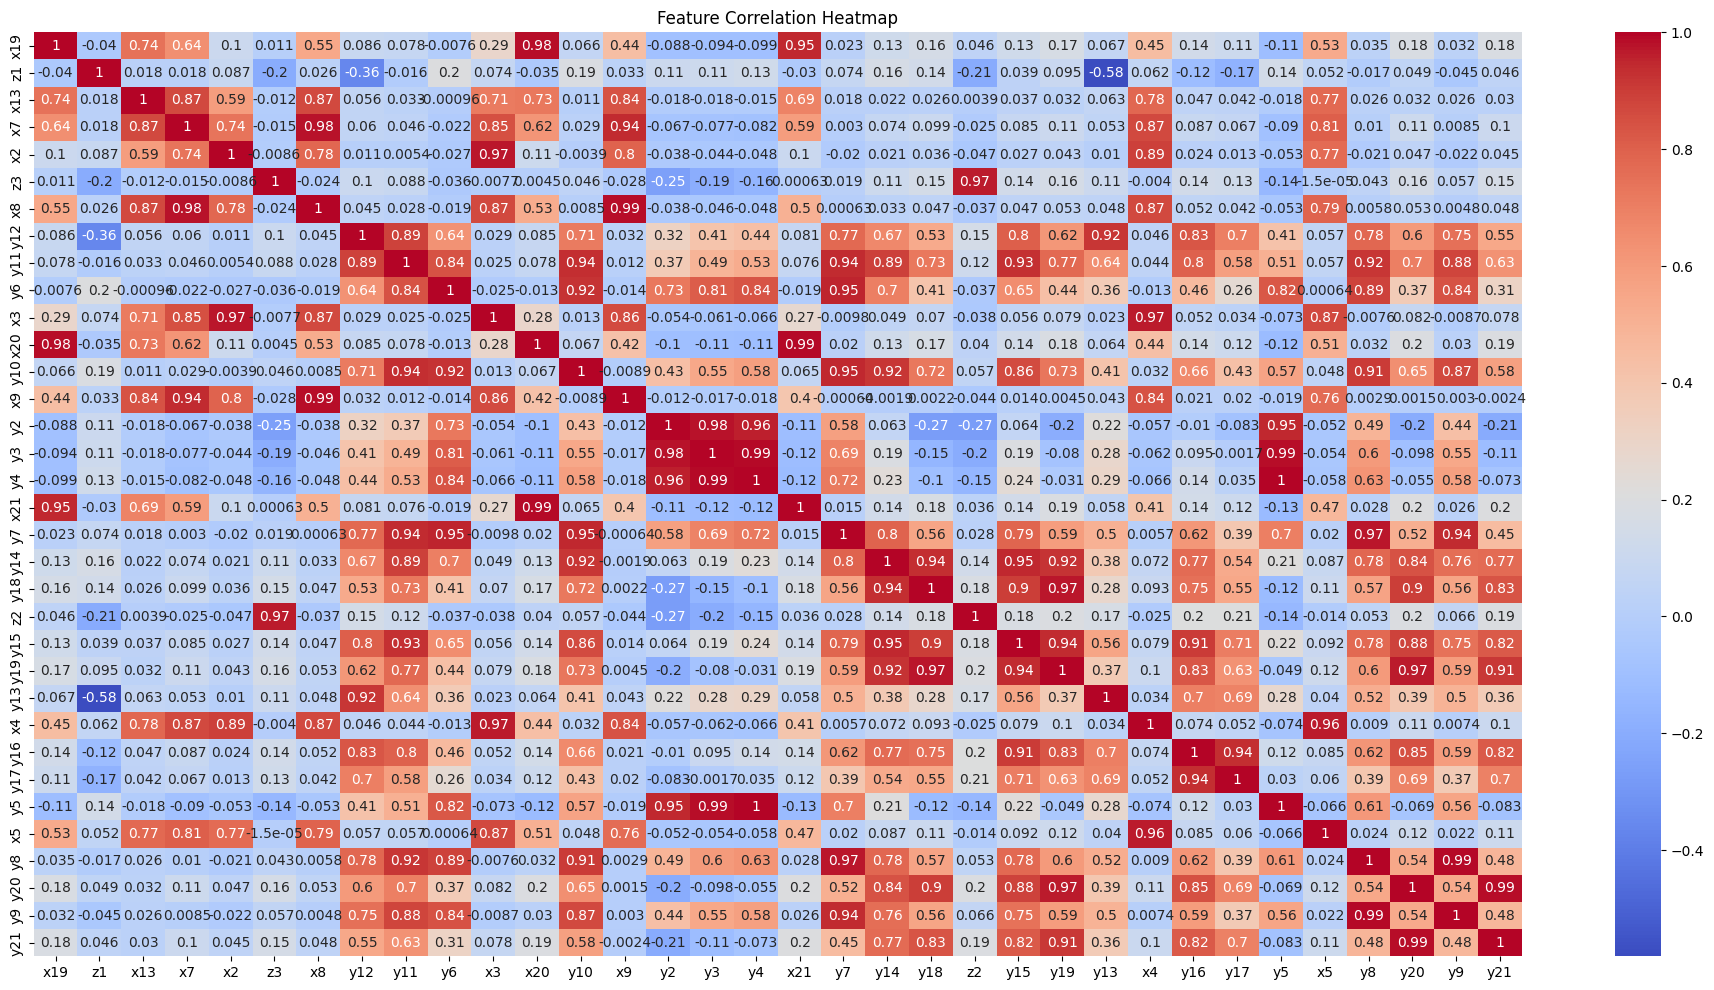

In [ ]:
# Compute correlation matrix
correlation_matrix = X_selected.corr()

# Plot heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

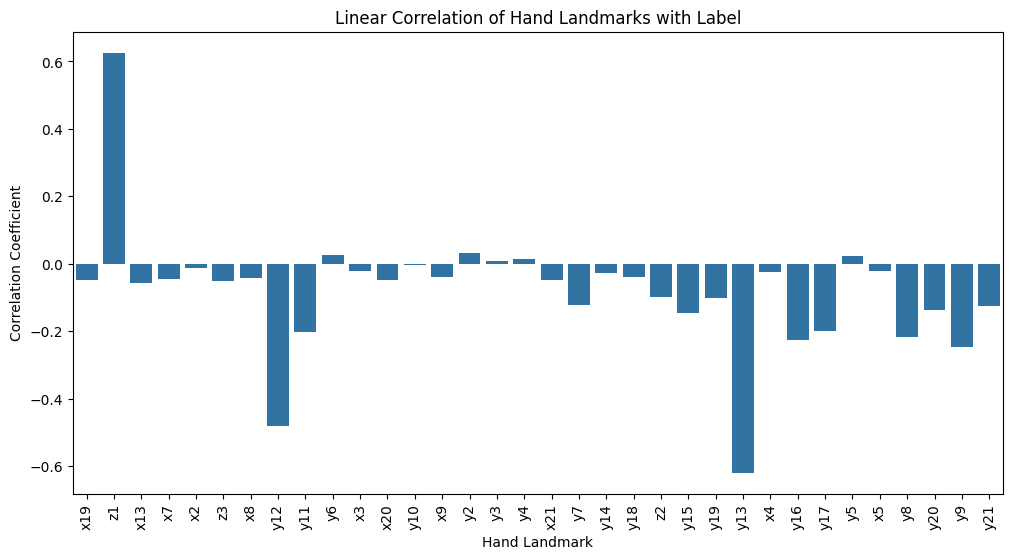

In [ ]:
# Compute correlation between each feature and the numeric label
correlation_with_label = df_selected.iloc[:, :-1].corrwith(df['label'])

# Plot the correlation values
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_label.index, y=correlation_with_label.values)
plt.xticks(rotation=90)
plt.title('Linear Correlation of Hand Landmarks with Label')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Hand Landmark')
plt.show()

##### Removing extremly high correlated features

In [ ]:
correlation_matrix = X_selected.corr()

# Set correlation threshold (0.9)
threshold = 0.95

# Create a list of features to remove based on correlation and importance
to_remove = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]

            # Check the importance of the correlated features
            importance_i = sorted(importances)[X_selected.columns.get_loc(feature_i)]
            importance_j = sorted(importances)[X_selected.columns.get_loc(feature_j)]

            # Remove the less important feature
            if importance_i < importance_j:
                to_remove.add(feature_i)  # Remove feature_i if its importance is lower
            else:
                to_remove.add(feature_j)  # Remove feature_j if its importance is lower

# Display the features to remove
print("Features to remove:", to_remove)
len(to_remove)

Features to remove: {'y3', 'z3', 'y18', 'x19', 'x4', 'y7', 'x3', 'y6', 'x7', 'y19', 'x8', 'x2', 'y4', 'y20', 'x20', 'y8', 'y2'}


17

In [ ]:
# Remove the selected features
X_new = X_selected.drop(columns=to_remove)

# Add the selected features back to the original DataFrame
df_new = X_new.join(df_selected[['label']])

# Display the updated DataFrame
df_new.head()

,z1,x13,y12,y11,y10,x9,x21,y14,z2,y15,y13,y16,y17,y5,x5,y9,y21,label
0,-3.649205e-07,-0.966743,0.101288,-0.147843,-0.619818,-1.111019,-1.759842,-0.418112,0.004224,-0.035114,0.255751,0.204247,0.346557,-0.430028,-1.049310,0.099134,0.074168,0
1,-2.345265e-07,0.877756,-0.462428,-0.554555,-0.788034,0.858762,1.966655,-0.450878,-0.011102,-0.310764,-0.479107,-0.254250,-0.267929,-1.672864,0.316538,-0.714327,-0.086635,0
2,-2.417307e-07,0.990136,-0.125685,-0.256563,-0.514345,0.993974,1.913833,-0.205272,-0.000184,0.005723,-0.140112,0.113272,0.095879,-1.428665,0.606619,-0.345127,0.270275,0
3,-1.233261e-07,0.847336,-0.587880,-0.663329,-0.701657,0.716182,1.738331,-0.404957,-0.002824,-0.405546,-0.531057,-0.350477,-0.304591,-1.551957,0.075864,-0.779399,-0.086693,0
4,-1.622995e-07,0.815049,-0.607865,-0.753648,-0.809056,0.750772,1.849127,-0.516624,-0.002884,-0.491475,-0.579391,-0.378658,-0.358153,-1.798027,-0.019465,-0.808991,-0.464123,0


In [ ]:
df_new.shape

(25675, 18)

In [ ]:
selected_indices = [
    df.columns.get_loc(col)
    for col in X_new.columns
    if col in df.columns
]

selected_indices

[2, 36, 34, 31, 28, 24, 60, 40, 5, 43, 37, 46, 49, 13, 12, 25, 61]

##### Show final heatmap

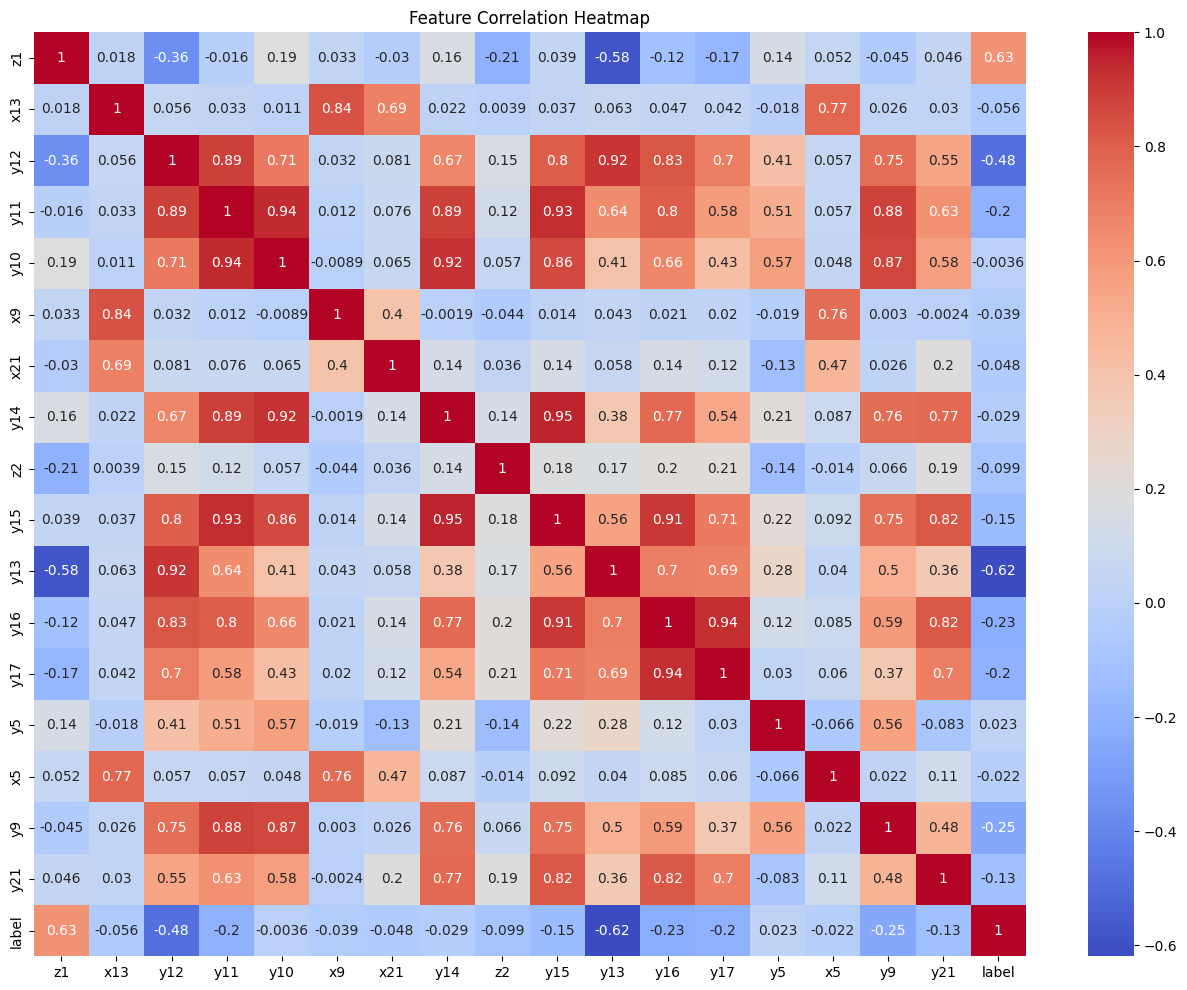

In [ ]:
# Compute correlation matrix
correlation_matrix = df_new.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

### Data Splitting

In [ ]:
# Splitting features and label

X = df_new.drop(columns=['label'])
y = df_new['label']

In [ ]:
from sklearn.model_selection import train_test_split

# Split data (70% train, 15% validation, 15% test)
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test,
    test_size=0.5,
    random_state=42,
    stratify=y_val_test
)

print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 17972 samples
Validation set: 3851 samples
Test set: 3852 samples


### Model Training and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_and_log(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.sklearn.log_model(model, model_name)

    return acc, prec, rec, f1

In [ ]:
import mlflow
mlflow.set_tracking_uri("file:///content/mlruns")  # Local tracking on Colab
mlflow.set_experiment("Hand_Gesture_Recognition")

2025/06/01 14:57:07 INFO mlflow.tracking.fluent: Experiment with name 'Hand_Gesture_Recognition' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/133827295823183066', creation_time=1748789827591, experiment_id='133827295823183066', last_update_time=1748789827591, lifecycle_stage='active', name='Hand_Gesture_Recognition', tags={}>

In [ ]:
mlflow.set_experiment("Hand Gesture Recognition")

results = []

2025/06/01 14:58:55 INFO mlflow.tracking.fluent: Experiment with name 'Hand Gesture Recognition' does not exist. Creating a new experiment.


In [ ]:
# Combine X_train and X_eval (for indexing purposes)
X_train_eval = pd.concat([X_train, X_val])

# Generate indices
train_indices = np.arange(len(X_train))          # 0 to len(X_train)-1
eval_indices = np.arange(len(X_train), len(X_train) + len(X_val))  # Next set of indices

# Create a single (train, eval) split
custom_cv = [(train_indices, eval_indices)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Forest
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

with mlflow.start_run(run_name="RandomForest_Tuned"):
    search_rf = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=5, cv=custom_cv, scoring='accuracy', n_jobs=-1)
    search_rf.fit(X_train_eval, pd.concat([y_train, y_val]))
    mlflow.log_params(search_rf.best_params_)
    acc, prec, rec, f1 = evaluate_and_log(search_rf.best_estimator_, X_test, y_test, "RandomForest")
    results.append(("RandomForest", acc, prec, rec, f1))

2025/06/01 15:06:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
from sklearn.svm import SVC

# SVM
svm_params = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": ["linear", "rbf"]
}

with mlflow.start_run(run_name="SVM_Tuned"):
    search_svm = RandomizedSearchCV(SVC(probability=True), svm_params, n_iter=5, cv=custom_cv, scoring='accuracy', n_jobs=-1)
    search_svm.fit(X_train_eval, pd.concat([y_train, y_val]))
    mlflow.log_params(search_svm.best_params_)
    acc, prec, rec, f1 = evaluate_and_log(search_svm.best_estimator_, X_test, y_test, "SVM")
    results.append(("SVM", acc, prec, rec, f1))

2025/06/01 15:15:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

with mlflow.start_run(run_name="KNN_Tuned"):
    search_knn = RandomizedSearchCV(KNeighborsClassifier(), knn_params, n_iter=5, cv=custom_cv, scoring='accuracy', n_jobs=-1)
    search_knn.fit(X_train_eval, pd.concat([y_train, y_val]))
    mlflow.log_params(search_knn.best_params_)
    acc, prec, rec, f1 = evaluate_and_log(search_knn.best_estimator_, X_test, y_test, "KNN")
    results.append(("KNN", acc, prec, rec, f1))

2025/06/01 15:22:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
from xgboost import XGBClassifier

# XGBoost
xgb_params = {
    "n_estimators": [50, 100, 500],
    "max_depth": [3, 6, 11],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0]
}

with mlflow.start_run(run_name="XGBoost_Tuned"):
    search_xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), xgb_params, n_iter=5, cv=custom_cv, scoring='accuracy', n_jobs=-1)
    search_xgb.fit(X_train_eval, pd.concat([y_train, y_val]))
    mlflow.log_params(search_xgb.best_params_)
    acc, prec, rec, f1 = evaluate_and_log(search_xgb.best_estimator_, X_test, y_test, "XGBoost")
    results.append(("XGBoost", acc, prec, rec, f1))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:12:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2025/06/01 16:14:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
df_results.to_csv("model_comparison.csv", index=False)
df_results

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.978193,0.978305,0.978193,0.978212
1,SVM,0.975857,0.976307,0.975857,0.975900
2,KNN,0.976116,0.976384,0.976116,0.976144
3,XGBoost,0.983645,0.983736,0.983645,0.983662


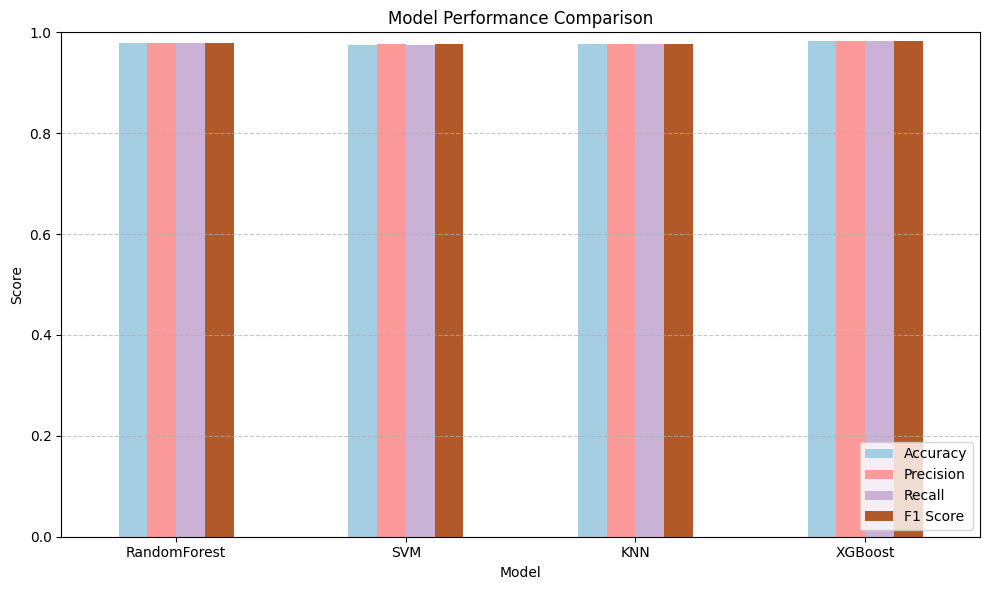

In [ ]:
import matplotlib.pyplot as plt

# Load the comparison DataFrame (if not already in memory)
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Plot
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
df_results.set_index("Model")[metrics].plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("model_comparison_plot.png")
plt.show()

In [ ]:
import joblib

best_model = search_xgb.best_estimator_

model_data = {
    "model": best_model,  # from best RandomizedSearchCV
    "feature_indices": selected_indices,  # list of int
    "eature_names": list(df_new.columns)
}

joblib.dump(model_data, "best_model_with_metadata.pkl")
print("✅ Model saved as 'best_model_with_metadata.pkl'")

✅ Model saved as 'best_model_with_metadata.pkl'


In [ ]:
!zip -r mlruns.zip mlruns

from google.colab import files
files.download("mlruns.zip")

  adding: mlruns/ (stored 0%)
  adding: mlruns/models/ (stored 0%)
  adding: mlruns/273836282674832982/ (stored 0%)
  adding: mlruns/273836282674832982/meta.yaml (deflated 30%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/ (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/meta.yaml (deflated 44%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/params/ (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/params/subsample (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/params/n_estimators (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/params/max_depth (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/params/learning_rate (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df69/artifacts/ (stored 0%)
  adding: mlruns/273836282674832982/a1f6d8b990a8450084da088e5954df6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>